# <center><u> <h1>English French-Translator</h1></u></center>

Savez-vous comment créer une application de traduction de langue?<br>
Did you understand the above sentence?<br>
Well after googling it, I found its meaning as:<br>
Do you know how to create a language translator app?<br>

We all know about Google Translate which allows us to convert from one language to another and it’s very useful for learning and understanding new languages.
<br>
<br>


![](https://daleonai.com/images/2019-11-05-improving-machine-translation-with-the-google-translation-api-advanced/1.png)


In this project we aim to convert English phrases to French using RNN on Deep Learning Neural Network

#Introduction
In this notebook, you will build a deep neural network that functions as part of an end-to-end machine translation pipeline. Your completed pipeline will accept English text as input and return the French translation.

Preprocess - You'll convert text to sequence of integers.
Models Create models which accepts a sequence of integers as input and returns a probability distribution over possible translations. After learning about the basic types of neural networks that are often used for machine translation, you will engage in your own investigations, to design your own model!
Prediction Run the model on English text.



Now let's start by importing necessary libraries.
- Importing numpy for working with arrays
-It then defines a Tokenizer object that will be used to split text into individual words using tensorflow tokenizer.
Refer:https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
- pad_sequences is used to ensure that all sequences in a list have the same length.
Refer:https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
-Keras model represents the actual neural network model.
-the Sequential model is a linear stack of layers.
-Importing GRU,Input,Dense,TimeDistributed,Activation,RepeatVector,Bidirectional,Dropout,LSTM,Embedding from tensorflow layers.
Refer:https://www.tensorflow.org/api_docs/python/tf/keras/layers


In [1]:
#Now import above mentioned libraries
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GRU, Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional, Dropout, LSTM, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
import tensorflow as tf

#Load Data
The data is located in data/small_vocab_en and data/small_vocab_fr. The small_vocab_en file contains English sentences with their French translations in the small_vocab_fr file. Load the English and French data from these files from running the cell below.

In [2]:
#load data here
#english data
english_data = "/content/small_vocab_en.txt"
#french data
french_dta = "/content/small_vocab_fr.txt"

- The OS module in Python provides functions for interacting with the operating system
- The code loads the data from a file called input_file. The code then splits the string of text into an array using split(). <br>
Then, it uses list comprehension to create a list with each line in the array as its own element.

In [3]:
#import os
import os
#define a function with one parameter path
def load_data(path):
  #join the path with join keyword
  input_file = os.path.join(path)
  #open file and read  as f
  with open(input_file, "r") as f:
    #read file
    data = f.read()
  #return with data split("\n")
  return data.split("\n")

Now loading all english and french data into variables.

In [4]:
#Now loading english data
english_sentences = load_data(english_data)
#Now loading french data
french_sentences = load_data(french_dta)

#Analysis of Dataset
Let us look at a few examples in the dataset of both language

In [5]:
#iterate over range of 5 in english and french
for i in range(5):
  print('Sample: ', i)
  #print english sentences
  print(english_sentences[i])
  #print french sentences
  print(french_sentences[i])
  print('-'*50)


Sample:  0
new jersey is sometimes quiet during autumn , and it is snowy in april .
new jersey est parfois calme pendant l' automne , et il est neigeux en avril .
--------------------------------------------------
Sample:  1
the united states is usually chilly during july , and it is usually freezing in november .
les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .
--------------------------------------------------
Sample:  2
california is usually quiet during march , and it is usually hot in june .
california est généralement calme en mars , et il est généralement chaud en juin .
--------------------------------------------------
Sample:  3
the united states is sometimes mild during june , and it is cold in september .
les états-unis est parfois légère en juin , et il fait froid en septembre .
--------------------------------------------------
Sample:  4
your least liked fruit is the grape , but my least liked is the apple .
votre moins aimé frui

#Convert to Vocabulary
The complexity of the problem is determined by the complexity of the vocabulary. A more complex vocabulary is a more complex problem. Let's look at the complexity of the dataset we'll be working with.

A counter is a container that stores elements as dictionary keys, and their counts are stored as dictionary values.<br>
Refer:https://docs.python.org/3/library/collections.html

In [6]:
#importing collections
import collections

In [7]:
#we will check for english vocabulary
#first we will iterate through english sentence
#then we will split that words and then we will use counter function
#refer more information in documentation
#we done for english vocab
#english_words_counter = collections.Counter([word for sentence in english_sentences for word in sentence.split()])
english_words_counter = collections.Counter([word for sentence in english_sentences for word in sentence.split()])
print('English Vocab: ', len(english_words_counter))
french_words_counter = collections.Counter([word for sentence in french_sentences for word in sentence.split()])
print('French Vocab: ', len(french_words_counter))


English Vocab:  227
French Vocab:  355


#Tokenize (IMPLEMENTATION)
For a neural network to predict on text data, it first has to be turned into data it can understand. Text data like "dog" is a sequence of ASCII character encodings. Since a neural network is a series of multiplication and addition operations, the input data needs to be numbers.

We can turn each character into a number or each word into a number. These are called character and word ids, respectively. Character ids are used for character level models that generate text predictions for each character. A word level model uses word ids that generate text predictions for each word. Word level models tend to learn better, since they are lower in complexity, so we'll use those.

Turn each sentence into a sequence of words ids using Keras's Tokenizer function. Use this function to tokenize english_sentences and french_sentences in the cell below.

In [8]:
#The code tokenizes a string and returns the tokens as well as the text that was tokenized.
#define a function
def tokenize(x):
  #create a object of tokenizer
  tokenizer = Tokenizer()
  #fit the data
  tokenizer.fit_on_texts(x)
  #return the  tokenizer.texts_to_sequences(x), tokenizer
  return tokenizer.texts_to_sequences(x), tokenizer

- The code starts by tokenizing the text_sentences list into individual sentences.Then, it prints out the word index of each sentence in the text_tokenized list.<br>
Next, it iterates through each sentence and prints out a sample output for that sentence.

In [9]:
# Tokenize Sample output
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',
    'This is a short sentence .']

#pass the sample text into tokenize[text_tokenized, text_tokenizer = tokenize(text_sentences)]
text_tokenized, text_tokenizer = tokenize(text_sentences)
#print text_tokenizer.word_index
print(text_tokenizer.word_index)
print()

#iterate over sample text and text_tokeinzed
for sample_i, (sent, token_sent) in enumerate(zip(text_sentences, text_tokenized)):

  #print sequence
  print('Sequence {} in x'.format(sample_i + 1))
  #print input
  print('  Input:  {}'.format(sent))
  #print Output
  print('  Output: {}'.format(token_sent))

{'the': 1, 'quick': 2, 'a': 3, 'brown': 4, 'fox': 5, 'jumps': 6, 'over': 7, 'lazy': 8, 'dog': 9, 'by': 10, 'jove': 11, 'my': 12, 'study': 13, 'of': 14, 'lexicography': 15, 'won': 16, 'prize': 17, 'this': 18, 'is': 19, 'short': 20, 'sentence': 21}

Sequence 1 in x
  Input:  The quick brown fox jumps over the lazy dog .
  Output: [1, 2, 4, 5, 6, 7, 1, 8, 9]
Sequence 2 in x
  Input:  By Jove , my quick study of lexicography won a prize .
  Output: [10, 11, 12, 2, 13, 14, 15, 16, 3, 17]
Sequence 3 in x
  Input:  This is a short sentence .
  Output: [18, 19, 3, 20, 21]


#Padding (IMPLEMENTATION)
When batching the sequence of word ids together, each sequence needs to be the same length. Since sentences are dynamic in length, we can add padding to the end of the sequences to make them the same length.

Make sure all the English sequences have the same length and all the French sequences have the same length by adding padding to the end of each sequence using Keras's pad_sequences function.

In [10]:
#define a pad function and pass the x parameter
def pad(x, length=None):
  #return pad_sequences with x and maxlength and keep padding =post
  return pad_sequences(x, maxlen=length, padding='post')


- The code is used to preprocess the input data set. - The tokenize function splits the text into individual tokens, which are then passed to a function called pad that takes in a list of tokens and pads them with a specified character (in this case, spaces).

In [12]:
#define preproces function with x and y
def preprocess(x, y):
    #preproces the data of x
    preprocess_x, x_tk = tokenize(x)

    #preproces the data of y
    preprocess_y, y_tk = tokenize(y)

    #padding the data x
    preprocess_x = pad(preprocess_x)
    #padding the data y
    preprocess_y = pad(preprocess_y)

    # Keras's sparse_categorical_crossentropy function requires the labels to be in 3 dimensions
    #Expanding dimensions
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)

    #return preprocess_x, preprocess_y, x_tk, y_tk
    return preprocess_x, preprocess_y, x_tk, y_tk

#preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer =\
    #preprocess(english_sentences, french_sentences)
preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer = preprocess(english_sentences, french_sentences)

#print Max English sentence length
max_english_sequence_length = preproc_english_sentences.shape[1]
#print Max french sentence length
max_french_sequence_length = preproc_french_sentences.shape[1]
#print len of english vocabulary
english_vocab_size = len(english_tokenizer.word_index)
#print len of french vocabulary
french_vocab_size = len(french_tokenizer.word_index)


print('Data Preprocessed')
print("Max English sentence length:", max_english_sequence_length)
print("Max French sentence length:", max_french_sequence_length)
print("English vocabulary size:", english_vocab_size)
print("French vocabulary size:", french_vocab_size)

Data Preprocessed
Max English sentence length: 15
Max French sentence length: 21
English vocabulary size: 199
French vocabulary size: 344


#Create Model

In this section, you will experiment with various neural network architectures. You will begin by training four relatively simple architectures.

Model 1 is a simple RNN
Model 2 is a RNN with Embedding
Model 3 is a Bidirectional RNN
Model 4 is an optional Encoder-Decoder RNN
After experimenting with the four simple architectures, you will construct a deeper architecture that is designed to outperform all four models.

## Ids Back to Text
The neural network will be translating the input to words ids, which isn't the final form we want. We want the French translation. The function logits_to_text will bridge the gab between the logits from the neural network to the French translation. You'll be using this function to better understand the output of the neural network.

In [13]:
#define a function of logits to text with 2 parameters logits, tokenizer
def logits_to_text(logits, tokenizer):

  #vThe code takes in an index_to_words dictionary which maps each word to its corresponding id. -
  #Then, it uses this dictionary to find all the words with ids 0-9 and prints them
  index_to_words = {id: word for word, id in tokenizer.word_index.items()}
  #make index_to_words[0] = '<PAD>'
  index_to_words[0] = '<PAD>'

  #So basically we are predicting output for a given word and then selecting best answer
  #Then selecting that label we reverse-enumerate the word from id
  return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

![Model](https://github.com/tommytracey/AIND-Capstone/raw/8267d4fe72e48c595a0aff46eaf0a805fff0f36d/images/embedding.png)

#Building Model
Here we use RNN model combined with GRU nodes for translation

- The code starts by defining the input shape and output sequence length.Next, it defines the number of unique English words in the dataset and French words in the dataset.The code then builds a Keras model using word embedding on x and y.It also sets hyperparameters for learning rate, which is 0.005, as well as building layers for this model.Finally, it compiles this model with sparse_categorical_crossentropy loss function and Adam optimizer with learning rate set to 0.005. The code will create a Keras model that has been trained to recognize words in English and French.

In [14]:
def embed_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a RNN model using word embedding on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Implement

    # Hyperparameters
    #learning_rate = 0.005
    learning_rate = 0.005

    # TODO: Build the layers
    #create model Sequential
    model = Sequential()
    #add embedding layer with english_vocab_size, 256, input_length=input_shape[1], input_shape=input_shape[1:]
    model.add(Embedding(english_vocab_size, 256, input_length=input_shape[1], input_shape=input_shape[1:]))
    #add GRU layer of 256
    model.add(GRU(256, return_sequences=True))
    #add TimeDistribute layer dense of 1024 and applying of activation function of relu
    model.add(TimeDistributed(Dense(1024, activation='relu')))
    #adding dropout layer
    model.add(Dropout(0.5))
    #add TimeDistributed Dense layer of french_vocab_size and applying softmax activation function
    model.add(TimeDistributed(Dense(french_vocab_size, activation='softmax')))

    # Compile model
    # with loss function of activation function with adam optimizer and accuaray metrix
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])


    #return model
    return model

In [15]:
# Reshaping the input to work with a basic RNN
#tmp_x = pad(preproc_english_sentences, preproc_french_sentences.shape[1])
tmp_x = pad(preproc_english_sentences, preproc_french_sentences.shape[1])
#tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2]))
tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2]))

Finally calling the model function

In [16]:
#calling our model
#with tmp_x.shape, preproc_french_sentences.shape[1], len(english_tokenizer.word_index)+1,len(french_tokenizer.word_index)+1)
simple_rnn_model = embed_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(french_tokenizer.word_index)+1)






/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Printing model summary

In [17]:
#print Model summary
simple_rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 21, 256)             │          51,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 21, 256)             │         394,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 21, 1024)            │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 21, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 21, 345)             │         353,625 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,062,745 (4.05 MB)

 Trainable params: 1,062,745 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

#Training the model
Here we start to train the model and pass the english text and the max_sequence_length, with vocab size for both english and french text

In [18]:
#model train with tmp_x, preproc_french_sentences, batch_size=1024, epochs=20, validation_split=0.2
history = simple_rnn_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=20, validation_split=0.2)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.5982 - loss: 1.9816 - val_accuracy: 0.8627 - val_loss: 0.4186
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.8681 - loss: 0.4010 - val_accuracy: 0.9071 - val_loss: 0.2739
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9058 - loss: 0.2811 - val_accuracy: 0.9222 - val_loss: 0.2281
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9190 - loss: 0.2393 - val_accuracy: 0.9270 - val_loss: 0.2121
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.9255 - loss: 0.2156 - val_accuracy: 0.9306 - val_loss: 0.2015
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9297 - loss: 0.2028 - val_accuracy: 0.9322 - val_loss: 0.1948
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9320 - loss: 0.1939 - val_accuracy: 0.9340 - val_loss: 0.1902
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9338 - loss: 0.1876 - 

#Saving our model

In [19]:
#save our model
simple_rnn_model.save('model.h5')

#Arbitrary Predictions
Performing predictions on the models using User Input.

In [20]:
#define a function for final_predictions with text timetable.
def final_predictions(text):

  #converting y_ids to words [y_id_to_word = {value: key for key, value in french_tokenizer.word_index.items()}]
  y_id_to_word = {value: key for key, value in french_tokenizer.word_index.items()}
  #y_id_to_word[0] = '<PAD>'
  y_id_to_word[0] = '<PAD>'

  #spliting our english word and tokezing
  sentence = [english_tokenizer.word_index[word] for word in text.split()]
  #padding our sentences
  sentence = pad_sequences([sentence], maxlen=preproc_french_sentences.shape[-2], padding='post')
  #converting into text
  text1 = logits_to_text(simple_rnn_model.predict(sentence[:1])[0], french_tokenizer)
  #avoiding of <PAD> part in output
  #create a variable of text
  text2=""
  #iterate over text split
  for i in text1.split():
    #if i == <pad>
    if i == '<PAD>':
      #then break
      break
    #else
    else:
      #text2=text2+" "+i
      text2=text2+" "+i
  #return text
  return text2

In [21]:
final_predictions(input())

it is during the spring
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


' il est en la au au'

#Implementation
Enter your input here to get predictions. We will using Gradio for implementation part. Refer video for detailed information

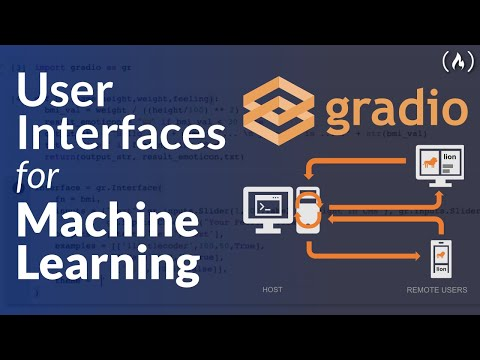

In [ ]:
####Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('RiCQzBluTxU', width=600, height=300)

In [22]:
#pip install gradio
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.1 MB/s eta 0:00:00


After installing, we import gradio as gr

In [23]:
#impprt gradio as gr
import gradio as gr

- The code creates an interface with a function called final_predictions. - The inputs of the interface are a textbox that has two lines and a placeholder, which is "Text to translate". - The outputs of the interface are "text". - The code launches the program in debug mode.

In [25]:
#creating interface for gradio
interface = gr.Interface(
    fn = final_predictions,
    inputs=gr.Textbox(lines=2, placeholder='Text to translate'),
    outputs='text'
)



#lanuch the interface
interface.launch(debug=True)



Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://5e09d3805322d618b8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://5e09d3805322d618b8.gradio.live


We have come to an end of this project but don't stop here, try as many projects of the similar type to get a better understanding of the use cases.
Solve the practice sheet of this project to test yourself.!!


![](https://c.tenor.com/Irg9yU74Zo8AAAAM/woohoo-yeah.gif)

Great job!! You have come to the end of this assignment. Treat yourself for this :))
<br>
# Do fill this [feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7s)
<br>
You may head on to the next project.